# Imports

In [ ]:
import numpy as np
import math
import csv
from matplotlib import pyplot as plt

# Constants

In [ ]:
ITERATION = 100
M = 3
COLORS = ['#ff0000', '#00ff00', '#0000ff', '#ffff00', '#ff00ff', '#00ffff']

# Functions

In [ ]:
def random_center(num_attr, k):
    random_enters = []
    temp = []
    for i in range(k):
        temp.clear()
        for j in range(num_attr):
            temp.append(np.random.rand() * np.random.randint(500))
        random_enters.append(temp.copy())
    return random_enters


def calculate_distance(first_point, second_point):
    distance = 0
    for i in range(len(first_point)):
        distance += np.square(float(first_point[i]) - float(second_point[i]))

    return np.sqrt(distance)


def updateMembershipValue(cluster_centers, data_counts, k):
    membership_matrix = [[0.0 for i in range(k)] for j in range(data_counts)]
    for d in range(data_counts):
        for cluster in range(k):
            temp = 0
            for c in range(k):
                a = calculate_distance(data[d], cluster_centers[cluster])
                b = calculate_distance(data[d], cluster_centers[c])
                temp += math.pow((a / b), (2 / (M - 1)))

            membership_matrix[d][cluster] = 1 / temp
    return membership_matrix


def f1(cluster_number, input_data, membership_matrix, num_attr):
    top = []

    for attr in range(num_attr):
        tmp = 0
        for d in range(len(data)):
            tmp += float(input_data[d][attr]) * math.pow(membership_matrix[d][cluster_number], M)
        top.append(tmp)
    return top


def f2(cluster_number, membership_matrix):
    down = 0
    for d in range(len(data)):
        down += math.pow(membership_matrix[d][cluster_number], M)
    return down


def f3(top, down):
    output = []
    for attr in range(len(top)):
        output.append(top[attr] / down)
    return output


def update_centers(membership_matrix, k):
    updated_centers = []
    for c in range(k):
        top = f1(c, data, membership_matrix, len(data[0]))
        down = f2(c, membership_matrix)
        updated_center = f3(top, down)
        updated_centers.append(updated_center)
    return updated_centers


def plot_data(centers, k):
    plt.style.use('grayscale')
    x_centers, y_centers = [], []
    x, y = [], []
    for i in range(k):
        x_centers.append(centers[i][0])
        y_centers.append(centers[i][1])
    for i in range(len(data)):
        x.append(float(data[i][0]))
        y.append(float(data[i][1]))
    plt.scatter(x, y, c='y', s=20)
    plt.scatter(x_centers, y_centers, c='black', s=500)
    plt.show()


def calculate_color_gradient(input_data, membership_matrix, k):
    colors = []
    for d in range(len(input_data)):
        membership = membership_matrix[d]
        if len(membership) < len(COLORS):
            for _ in range(len(COLORS) - len(membership)):
                membership.append(0)
        red = '{:02x}'.format(int((membership[0] + membership[3] + membership[4]) * 255))
        green = '{:02x}'.format(int((membership[1] + membership[3] + membership[5]) * 255))
        blue = '{:02x}'.format(int((membership[2] + membership[4] + membership[5]) * 255))
        final_color = f'#{red}{green}{blue}'
        colors.append(final_color)
    return colors


def final_plt(input_data, membership_matrix, centers, k):
    x, y = [], []
    colors = calculate_color_gradient(input_data, membership_matrix, k)

    for d in range(len(input_data)):
        x.append(float(data[d][0]))
        y.append(float(data[d][1]))
        plt.scatter(float(data[d][0]), float(data[d][1]), c=colors[d], s=20)

    for i in range(len(centers)):
        plt.scatter(centers[i][0], centers[i][1], c=COLORS[i], s=500, edgecolors='black')
    plt.show()


def calculate_cost(membership_matrix, centers, k):
    final_sum = 0
    for d in range(len(data)):
        sum_1 = 0
        for c in range(k):
            u = math.pow(membership_matrix[d][c], M)
            distance = math.pow(calculate_distance(data[d], centers[c]), 2)
            sum_1 += u * distance
        final_sum += sum_1
    return final_sum


# plot K = 1 to k = 6 clusters and also it's costs
# then you should choose number og clusters
def find_best_k():
    entropy = []
    for i in range(1, 7):
        centers = random_center(len(data[0]), i)
        for iteration in range(ITERATION):
            membership_matrix = updateMembershipValue(centers, len(data), i)
            centers = update_centers(membership_matrix, i)
        # final_plt(data, membership_matrix, centers, i)
        entropy.append(calculate_cost(membership_matrix, centers, i))
    plt.plot([i for i in range(1, 7)], entropy)
    plt.show()


# plot the whole process of clustering with defined number of clusters
def FCM(k):
    centers = random_center(len(data[0]), k)
    for iteration in range(ITERATION):
        # if iteration % 10 == 0:
            # plot_data(centers, k)
        membership_matrix = updateMembershipValue(centers, len(data), k)
        centers = update_centers(membership_matrix, k)
    final_plt(data, membership_matrix, centers, k)

## Best Cluster number using **Elbow** method  
### (for example for data 3)

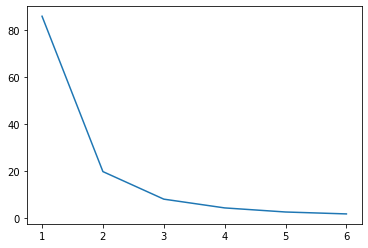

In [ ]:
data = []
with open(f'data3.csv', 'r') as file:
  reader = csv.reader(file)
  for row in reader:
      data.append(row)
  find_best_k()

we can see that the best choice is **K=3** for cluster numbers

# Let's see the Clustring with K=3
### (for data 3)

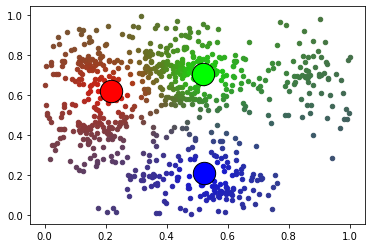

In [ ]:
FCM(3)

# Trying different Cluster numbers

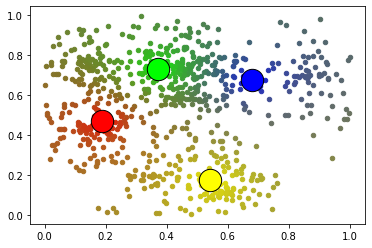

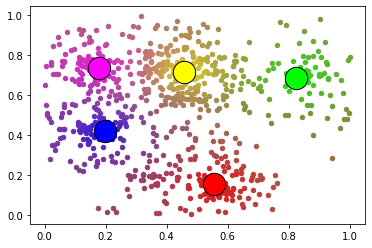

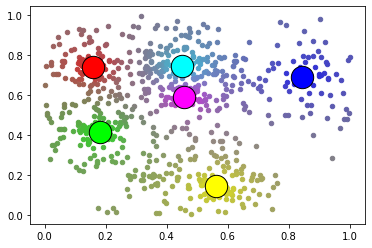

In [ ]:
FCM(4)
FCM(5)
FCM(6)